# KNN SVM ANAN

# 1. KNN

## 1.1 Testing Local


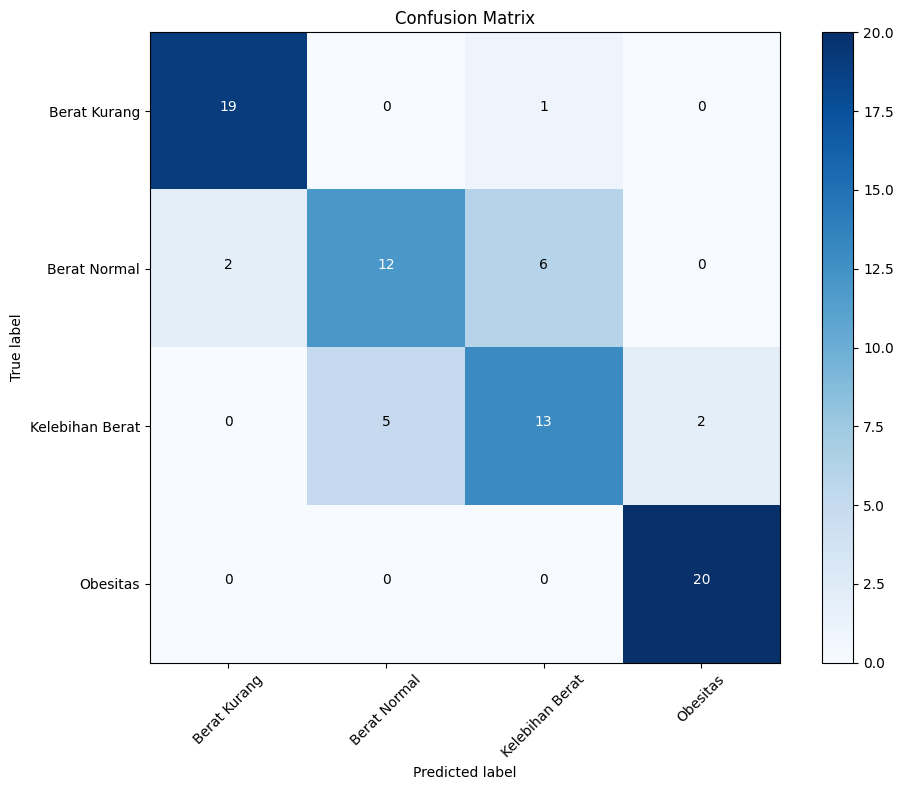

Akurasi Testing KNN pada Dataset Baru: 0.8
Precision :  0.7924337916984976
Recall :  0.7999999999999999
F Score :  0.794464717330571


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Memuat dataset latih
df_klasifikasi_train = pd.read_csv("ObesityDataSet_Kaggle.csv")

# Memuat dataset uji
df_klasifikasi_test = pd.read_csv("Testing.csv")

# Pisahkan fitur dan target untuk dataset latih
X_train = df_klasifikasi_train[['Gender', 'Age', 'Height', 'Weight']]
y_train = df_klasifikasi_train['Label']

# Pisahkan fitur dan target untuk dataset uji
X_test_new = df_klasifikasi_test[['Gender', 'Age', 'Height', 'Weight']]
y_test_new = df_klasifikasi_test['Label']

# Definisikan preprocessor untuk fitur numerik dan kategorikal
numerical_features = ['Age', 'Height', 'Weight']
categorical_features = ['Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Pipeline: Preprocessor + KNN
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Latih model KNN pada dataset latih
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada dataset uji yang baru
y_pred_new = pipeline.predict(X_test_new)

# Hitung matriks kebingungan
cm_new = confusion_matrix(y_test_new, y_pred_new)

# Visualisasikan matriks kebingungan
plt.figure(figsize=(10, 8))
plt.imshow(cm_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test_new)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(cm_new.shape[0]):
    for j in range(cm_new.shape[1]):
        plt.text(j, i, format(cm_new[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_new[i, j] > cm_new.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Hitung akurasi pada dataset uji yang baru
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print('Akurasi Testing KNN pada Dataset Baru:', accuracy_new)

# Hitung precision, recall, dan f-score pada dataset uji yang baru
P_new = precision_recall_fscore_support(y_test_new, y_pred_new, average='macro')
print("Precision : ", P_new[0])
print("Recall : ", P_new[1])
print("F Score : ", P_new[2])

## 1.2	Full Kaggle

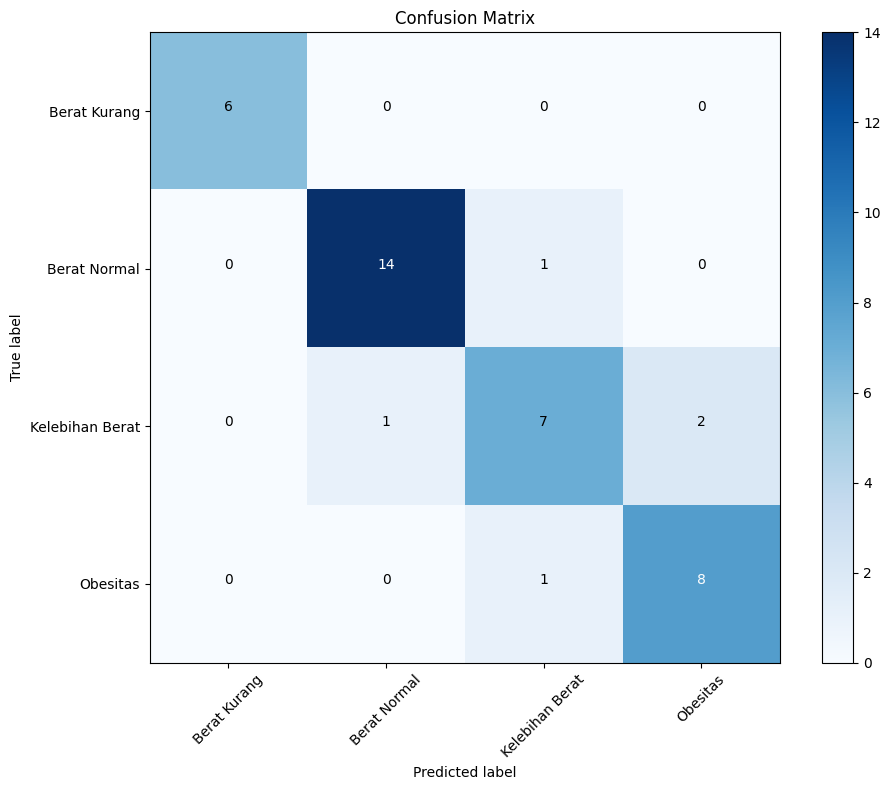

Akurasi Testing KNN: 0.875
Precision :  0.8777777777777778
Recall :  0.8805555555555555
F Score :  0.8780701754385964


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Memuat dataset
df_klasifikasi = pd.read_csv("ObesityDataSet_Kaggle.csv")

# Pisahkan fitur dan target
X = df_klasifikasi[['Jenis Kelamin', 'Umur', 'Tinggi_Badan', 'Berat_Badan']]
y = df_klasifikasi['Kategori']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan preprocessor untuk fitur numerik dan kategorikal
numerical_features = ['Umur', 'Tinggi_Badan', 'Berat_Badan']
categorical_features = ['Jenis Kelamin']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Pipeline: Preprocessor + KNN
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Latih model KNN
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = pipeline.predict(X_test)

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan matriks kebingungan
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing KNN:', accuracy)

# Hitung precision, recall, dan f-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision : ", P[0])
print("Recall : ", P[1])
print("F Score : ", P[2])


# 2. SVM

## 2.1 Testing Local

In [4]:
import pandas as pd

# Memuat dataset latih
df_klasifikasi_train = pd.read_csv("ObesityDataSet_Kaggle.csv")

# Memuat dataset uji
df_klasifikasi_test = pd.read_csv("Testing.csv")

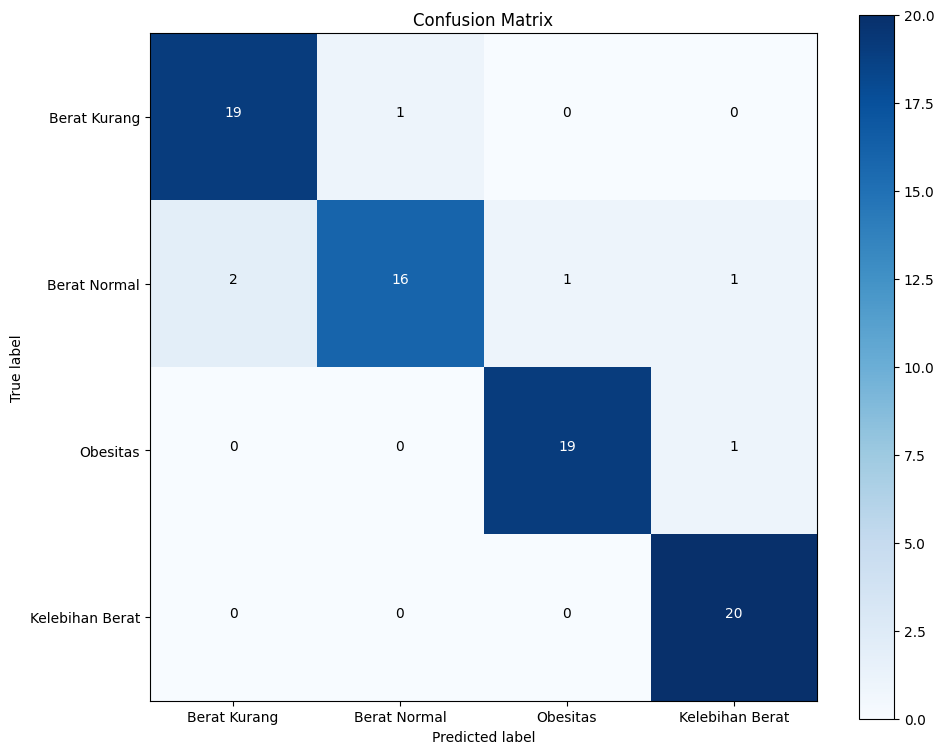

Akurasi Testing SVM pada Dataset Baru: 0.925
Precision :  0.9262573211102623
Recall :  0.925
F Score :  0.9235187713846251


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Memuat dataset latih
df_klasifikasi_train = pd.read_csv("ObesityDataSet_Kaggle.csv")

# Memuat dataset uji
df_klasifikasi_test = pd.read_csv("Testing.csv")

# Pisahkan fitur dan target untuk dataset latih
X_train = df_klasifikasi_train[['Gender', 'Age', 'Height', 'Weight']]
y_train = df_klasifikasi_train['Label']

# Pisahkan fitur dan target untuk dataset uji
X_test_new = df_klasifikasi_test[['Gender', 'Age', 'Height', 'Weight']]
y_test_new = df_klasifikasi_test['Label']

# Definisikan preprocessor untuk fitur numerik dan kategorikal
numerical_features = ['Age', 'Height', 'Weight']
categorical_features = ['Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Pipeline: Preprocessor + SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear', random_state=42))])

# Latih model SVM pada dataset latih
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada dataset uji yang baru
y_pred_new = pipeline.predict(X_test_new)

# Hitung matriks kebingungan
cm_new = confusion_matrix(y_test_new, y_pred_new)

# Visualisasikan matriks kebingungan
plt.figure(figsize=(10, 8))
plt.imshow(cm_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = y_test_new.unique()  # Mengambil kelas unik dari y_test_new
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(cm_new.shape[0]):
    for j in range(cm_new.shape[1]):
        plt.text(j, i, format(cm_new[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_new[i, j] > cm_new.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Hitung akurasi pada dataset uji yang baru
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print('Akurasi Testing SVM pada Dataset Baru:', accuracy_new)

# Hitung precision, recall, dan f-score pada dataset uji yang baru
P_new = precision_recall_fscore_support(y_test_new, y_pred_new, average='macro')
print("Precision : ", P_new[0])
print("Recall : ", P_new[1])
print("F Score : ", P_new[2])

In [7]:
import pickle

# Latih model SVM pada dataset latih
model = pipeline.fit(X_train, y_train)

# Simpan model ke file menggunakan pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Memuat model
with open('svm_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Fungsi untuk prediksi
def predict_obesity(data):
    prediction = model.predict(data)
    return prediction

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    gender = data['Jenis Kelamin']
    umur = data['umur']
    height = data['Tinggi_Badan']
    weight = data['Berat_Badan']
    data = [[gender, umur, height, weight]]
    prediction = predict_obesity(data)
    return jsonify({'Kategori': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
#contoh
import pickle

pickle.dump(xxxxxxxxxx,open('model.pkl','wb'))

NameError: name 'xxxxxxxxxx' is not defined